In [58]:
import pandas as pd
import numpy as np 

df = pd.read_csv('../../data/titanic/train.csv')
df_test = pd.read_csv('../../data/titanic/test.csv')


In [59]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [60]:
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

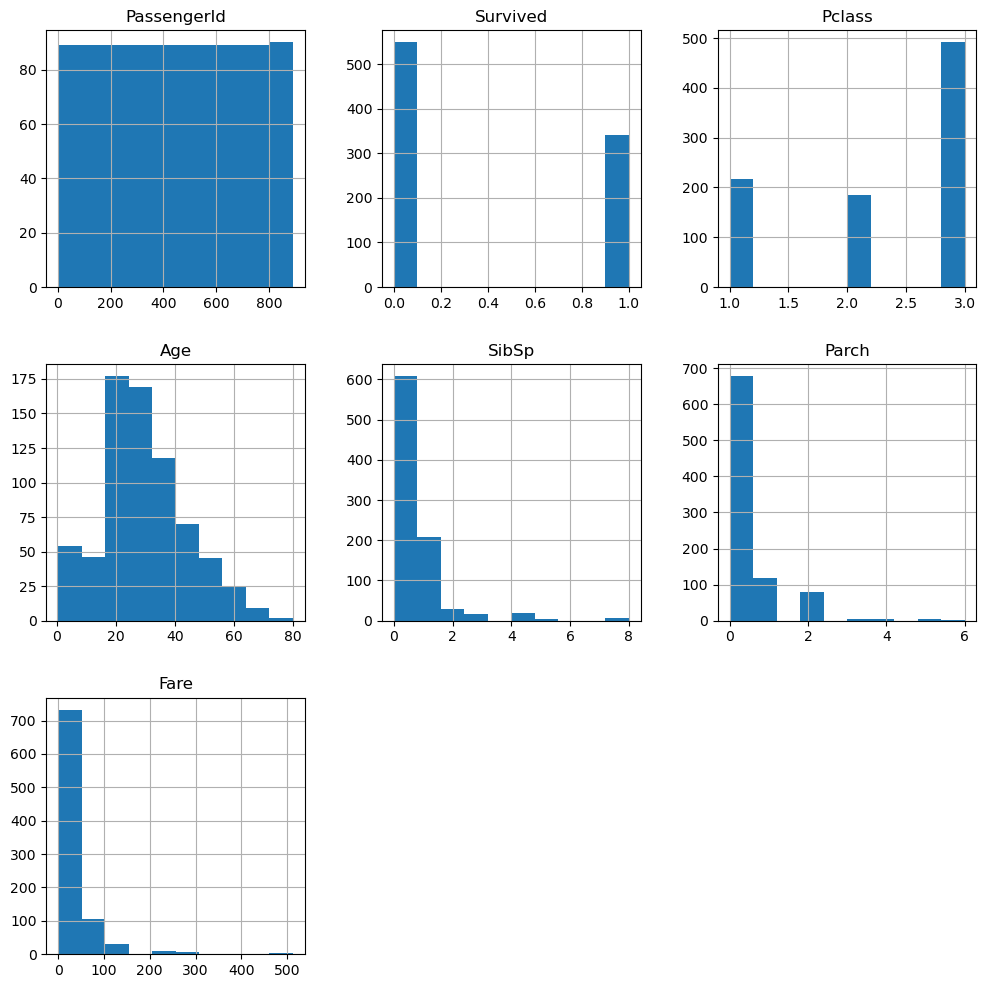

In [61]:
df.hist(figsize=(12,12))

In [62]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [63]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.isnull().sum()

C:\Users\unine\AppData\Local\Temp\ipykernel_17192\3139720851.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\unine\AppData\Local\Temp\ipykernel_17192\3139720851.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [64]:
df.loc[df['Sex'] == 'male', 'Sex'] = 0
df.loc[df['Sex'] == 'female', 'Sex'] = 1
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked_Q   891 non-null    bool   
 12  Embarked_S   891 non-null    bool   
dtypes: bool(2), float64(2), int64(5), object(4)
memory usage: 78.4+ KB


In [65]:
columns_to_drop = ['PassengerId', 'Ticket', 'Cabin']
df.drop(columns=columns_to_drop, inplace=True)

df['Title'] = df['Name'].str.extract(', ([A-Za-z]+)\.')

title_counts = df['Title'].value_counts()
rare_titles = title_counts[title_counts < 10].index
df['Title'] = df['Title'].replace(rare_titles, 'Rare', inplace=True)

<>:4: SyntaxWarning: invalid escape sequence '\.'
<>:4: SyntaxWarning: invalid escape sequence '\.'
C:\Users\unine\AppData\Local\Temp\ipykernel_17192\2723930912.py:4: SyntaxWarning: invalid escape sequence '\.'
  df['Title'] = df['Name'].str.extract(', ([A-Za-z]+)\.')
C:\Users\unine\AppData\Local\Temp\ipykernel_17192\2723930912.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Title'] = df['Title'].replace(rare_titles, 'Rare', inplace=True)


In [66]:
df = df.drop(columns=['Name'])
df = pd.get_dummies(df, columns=['Title'], drop_first=True)



In [67]:
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()
features_to_scale = ['Age', 'Fare']

df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

In [68]:
y= df['Survived']
X= df.drop(columns=['Survived'])

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

accuracy = model.score(X_val, y_val)
print(f'Validation Accuracy: {accuracy:.4f}')

Validation Accuracy: 0.7877


In [70]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7, 9, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
best_accuracy = best_model.score(X_val, y_val)
print(f'Best Validation Accuracy after Hyperparameter Tuning: {best_accuracy:.4f}')


Best Validation Accuracy after Hyperparameter Tuning: 0.7989


In [71]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_accuracy = rf_model.score(X_val, y_val)
print(f'Random Forest Validation Accuracy: {rf_accuracy:.4f}')

Random Forest Validation Accuracy: 0.7989


In [72]:

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 9, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)
best_rf_model = grid_search_rf.best_estimator_
best_rf_accuracy = best_rf_model.score(X_val, y_val)
print(f'Best Random Forest Validation Accuracy after Hyperparameter Tuning: {best_rf_accuracy:.4f}')

Best Random Forest Validation Accuracy after Hyperparameter Tuning: 0.8156


In [73]:
print(df_test.columns)

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [74]:
passenger_ids = df_test['PassengerId']

In [75]:


df_test = df_test.drop(['PassengerId','Cabin', 'Ticket', 'Survived'], axis=1, errors='ignore')
df_test['Age'].fillna(df_test['Age'].median(), inplace=True)
df_test['Fare'].fillna(df_test['Fare'].median(), inplace=True)
df_test = pd.get_dummies(df_test, columns=['Embarked'], drop_first=True)
df_test.loc[df_test['Sex'] == 'male', 'Sex'] = 0
df_test.loc[df_test['Sex']  == 'female', 'Sex'] = 1
df_test[features_to_scale] = scaler.transform(df_test[features_to_scale])

df_test['Title'] = df_test['Name'].str.extract(', ([A-Za-z]+)\.')
rare_titles_test = df_test['Title'].value_counts()[df_test['Title'].value_counts() < 10].index
df_test['Title'] = df_test['Title'].replace(rare_titles_test, 'Rare', inplace=True)
df_test = df_test.drop(columns=['Name'])
df_test = pd.get_dummies(df_test, columns=['Title'], drop_first=True)


pred = best_rf_model.predict(df_test)
submission = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Survived': pred
})
submission.to_csv('titanic_submission.csv', index=False)



<>:9: SyntaxWarning: invalid escape sequence '\.'
<>:9: SyntaxWarning: invalid escape sequence '\.'
C:\Users\unine\AppData\Local\Temp\ipykernel_17192\587300764.py:9: SyntaxWarning: invalid escape sequence '\.'
  df_test['Title'] = df_test['Name'].str.extract(', ([A-Za-z]+)\.')
C:\Users\unine\AppData\Local\Temp\ipykernel_17192\587300764.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['Age'].fillna(df_test['Age'].median(), inplace=True)
C:\Users\unine\AppData\Local\Temp\ipykernel_17192\587300764.py:3: FutureWarning: 